In [1]:
# !pip install pandas
# !pip install scikit-learn

# Load Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import resample
from sklearn import preprocessing

import os
dataset_path = []

for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        if filename.endswith('.csv'):
            dfp = os.path.join(dirname, filename)
            dataset_path.append(dfp)


In [3]:
print(len(dataset_path))

17


In [4]:
# mult = 5
cols = list(pd.read_csv(dataset_path[1], nrows=1))

def load_file(path):
    # data = pd.read_csv(path, sep=',')
    data = pd.read_csv(path,
                   usecols =[i for i in cols if i != " Source IP" 
                             and i != ' Destination IP' and i != 'Flow ID' 
                             and i != 'SimillarHTTP' and i != 'Unnamed: 0'])

    return data

In [5]:
samples = pd.concat([load_file(dfp) for dfp in dataset_path], ignore_index=True)

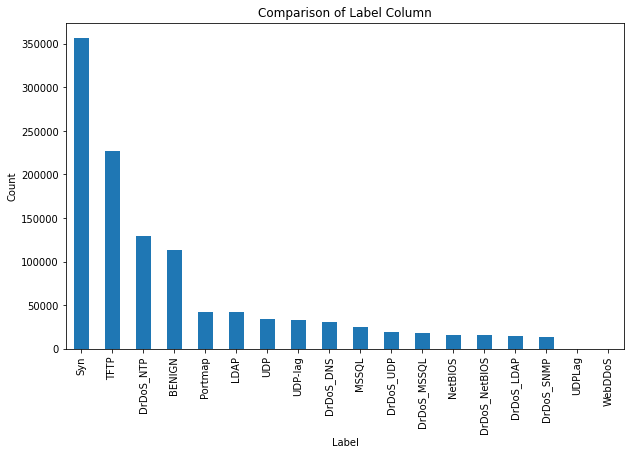

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = samples[' Label'].value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [7]:
samples

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,910,20073,17,2018-12-01 11:09:58.622545,48,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
1,588,39159,17,2018-12-01 11:10:43.911581,2,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
2,953,22161,17,2018-12-01 11:08:16.500655,1,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
3,663,18811,17,2018-12-01 11:11:00.683438,1,2,0,2944.0,0.0,1472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
4,591,4168,17,2018-12-01 11:11:08.136206,1,2,0,2896.0,0.0,1448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130645,80,46280,6,2018-11-03 11:30:16.186036,53,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,BENIGN
1130646,80,46282,6,2018-11-03 11:30:16.186163,66,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,BENIGN
1130647,51233,123,17,2018-11-03 11:30:16.402521,26288,2,2,96.0,96.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
1130648,52968,80,6,2018-11-03 11:30:17.145199,30679,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN


In [8]:

# 根据 'Label' 列分组数据
grouped = samples.groupby(' Label')

# 创建存储分割文件的目录
output_dir = 'class_split'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 为每个类别保存一个CSV文件
for label, group in grouped:
    filename = os.path.join(output_dir, f"{label}.csv")
    group.to_csv(filename, index=False)

print("数据已按类别分割并保存到文件中。")

数据已按类别分割并保存到文件中。
